# Hypothesis Testing

This notebook performs statistical hypothesis testing to determine if there is a significant difference in the number of charging stations between the European and Asian sides of Istanbul.


In [1]:
# Install required libraries
import sys
!{sys.executable} -m pip install pandas scipy numpy matplotlib seaborn --quiet



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: pip3 install --upgrade pip


In [2]:
# Import required libraries
import pandas as pd
from scipy.stats import chi2, chi2_contingency
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)


## Step 1: Load Cleaned Data


In [3]:
# Read the cleaned CSV file
df = pd.read_csv('cleaned_stations.csv')

print(f"Total number of stations: {len(df)}")
print(f"\nFirst few rows:")
print(df.head())


Total number of stations: 2933

First few rows:
  ISTASYON_NO                                                AD  \
0    ŞRJ/2140  KMO FENERKÖY KUZEY OHT1, KMO FENERKÖY KUZEY OHT2   
1    ŞRJ/2672                                      CAROUSEL AVM   
2    ŞRJ/2803                            SERENİTY COMFORT HOTEL   
3    ŞRJ/2804                                        MAYİ HOTEL   
4    ŞRJ/2859                             THE İSTANBUL REZİDANS   

                                               ADRES  \
0  Ali Paşa Mahallesi Merkez Saray Sokağı  Y: 351...   
1  Zeytinlik Mahallesi Halit Uşaklıgil Caddesi  N...   
2  Mahmutbey Mahallesi Payami Safa Caddesi  No:16...   
3  Mahmutbey Mahallesi Payami Safa Caddesi  No:25...   
4  Sümer Mahallesi Pr.dr. Turan Güneş Caddesi  No...   

                                      operator    brand   LATITUDE  LONGITUDE  \
0  BEEFULL ENERJİ TEKNOLOJİLERİ ANONİM ŞİRKETİ  beefull  41.121918  28.228961   
1  BEEFULL ENERJİ TEKNOLOJİLERİ ANONİM ŞİRKETİ  be

## Step 2: Display Side Distribution


In [4]:
# Count stations by side
side_counts = df['side'].value_counts()
print("Number of stations by side:")
print(side_counts)
print(f"\nEurope: {side_counts.get('Europe', 0)} stations")
print(f"Asia: {side_counts.get('Asia', 0)} stations")


Number of stations by side:
side
Europe    1605
Asia      1328
Name: count, dtype: int64

Europe: 1605 stations
Asia: 1328 stations


## Step 3: Define Statistical Hypotheses


In [5]:
# Statistical Hypotheses:
# H0 (Null Hypothesis): There is no significant difference in the number of stations 
#                        between the European and Asian sides.
# H1 (Alternative Hypothesis): There is a significant difference in the number of 
#                              stations between the two sides.

print("H0: There is no significant difference in the number of stations between the European and Asian sides.")
print("H1: There is a significant difference in the number of stations between the two sides.")
print("\nSignificance level (alpha) = 0.05")


H0: There is no significant difference in the number of stations between the European and Asian sides.
H1: There is a significant difference in the number of stations between the two sides.

Significance level (alpha) = 0.05


## Step 4: Perform Chi-Square Test


In [6]:
# Prepare data for chi-square test
# We'll use a chi-square goodness-of-fit test to compare observed vs expected counts
# Under H0, we expect equal distribution (50-50)

observed = side_counts.values
total = observed.sum()
expected = np.array([total / 2, total / 2])  # Expected equal distribution

print("Observed counts:", observed)
print("Expected counts (under H0):", expected)

# Perform chi-square test
chi2_stat = np.sum((observed - expected) ** 2 / expected)
dof = len(observed) - 1  # degrees of freedom

# Calculate p-value using chi-square distribution
p_value = 1 - chi2.cdf(chi2_stat, dof)

print(f"\nChi-square statistic: {chi2_stat:.4f}")
print(f"Degrees of freedom: {dof}")
print(f"P-value: {p_value:.6f}")


Observed counts: [1605 1328]
Expected counts (under H0): [1466.5 1466.5]

Chi-square statistic: 26.1606
Degrees of freedom: 1
P-value: 0.000000


## Step 5: Interpretation


In [7]:
# Interpret the results
alpha = 0.05

print("=" * 60)
print("HYPOTHESIS TEST RESULTS")
print("=" * 60)
print(f"Test Statistic (Chi-square): {chi2_stat:.4f}")
print(f"P-value: {p_value:.6f}")
print(f"Significance Level (alpha): {alpha}")
print("=" * 60)

if p_value < alpha:
    print("\n✓ Reject H0: There is a significant difference in the number of")
    print("  charging stations between the European and Asian sides of Istanbul.")
    print(f"  (p-value = {p_value:.6f} < {alpha})")
else:
    print("\n✗ Fail to reject H0: No significant difference is detected in the")
    print("  number of charging stations between the two sides.")
    print(f"  (p-value = {p_value:.6f} >= {alpha})")

print("\n" + "=" * 60)


HYPOTHESIS TEST RESULTS
Test Statistic (Chi-square): 26.1606
P-value: 0.000000
Significance Level (alpha): 0.05

✓ Reject H0: There is a significant difference in the number of
  charging stations between the European and Asian sides of Istanbul.
  (p-value = 0.000000 < 0.05)



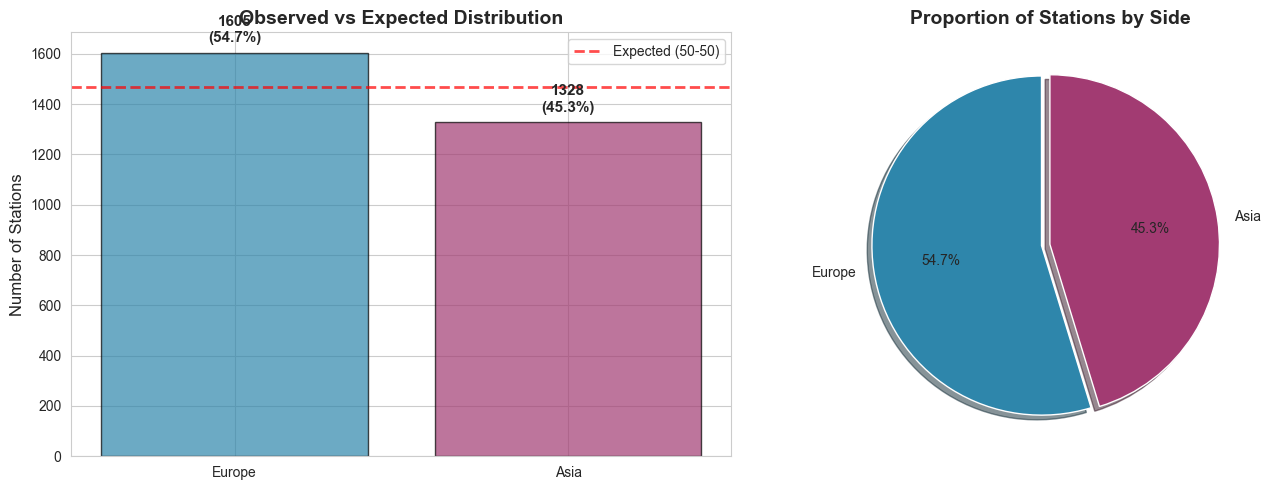

In [8]:
# Visualization for Test 1
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart comparing observed vs expected
sides = ['Europe', 'Asia']
counts = [side_counts['Europe'], side_counts['Asia']]
colors = ['#2E86AB', '#A23B72']

ax1.bar(sides, counts, color=colors, alpha=0.7, edgecolor='black')
ax1.axhline(y=total/2, color='red', linestyle='--', linewidth=2, label='Expected (50-50)', alpha=0.7)
ax1.set_ylabel('Number of Stations', fontsize=12)
ax1.set_title('Observed vs Expected Distribution', fontsize=14, fontweight='bold')
ax1.legend()

# Add value labels
for i, (side, count) in enumerate(zip(sides, counts)):
    ax1.text(i, count + 30, f'{count}\n({count/total*100:.1f}%)', 
             ha='center', va='bottom', fontsize=11, fontweight='bold')

# Pie chart
ax2.pie(counts, labels=sides, autopct='%1.1f%%', startangle=90, colors=colors, 
        explode=(0.05, 0), shadow=True)
ax2.set_title('Proportion of Stations by Side', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


## Step 6: Test 2 - Top Operators' Side Preferences


In [9]:
# Test if top 5 operators show side preferences
# H0: Each operator has the same Europe/Asia distribution as the overall distribution (54.7% / 45.3%)
# H1: At least one operator has a different distribution

print("="*70)
print("TEST 2: TOP OPERATORS' SIDE PREFERENCES")
print("="*70)

# Get top 5 operators
top_5_operators = df['operator'].value_counts().head(5).index

# Create shortened names
operator_short_names = {
    'ZES DİJİTAL TİCARET ANONİM ŞİRKETİ': 'ZES',
    'VOLTRUN ENERJİ ANONİM ŞİRKETİ': 'VOLTRUN',
    'EŞARJ ELEKTRİKLİ ARAÇLAR ŞARJ SİSTEMLERİ ANONİM ŞİRKETİ': 'EŞARJ',
    'BEEFULL ENERJİ TEKNOLOJİLERİ ANONİM ŞİRKETİ': 'BEEFULL',
    'ZEPLİN TURİZM ARAÇ KİRALAMA MOBİLİTE VE ENERJİ YATIRIMLARI ANONİM ŞİRKETİ': 'ZEPLİN'
}

# Overall proportions
overall_europe_prop = side_counts['Europe'] / total
overall_asia_prop = side_counts['Asia'] / total

print(f"\nOverall distribution: Europe {overall_europe_prop*100:.1f}% | Asia {overall_asia_prop*100:.1f}%")
print(f"\nTesting each operator against this baseline:\n")

test_results = []

for operator in top_5_operators:
    operator_df = df[df['operator'] == operator]
    operator_side_counts = operator_df['side'].value_counts()
    
    # Observed counts
    obs_europe = operator_side_counts.get('Europe', 0)
    obs_asia = operator_side_counts.get('Asia', 0)
    operator_total = len(operator_df)
    
    # Expected counts based on overall distribution
    exp_europe = operator_total * overall_europe_prop
    exp_asia = operator_total * overall_asia_prop
    
    # Chi-square test
    observed_op = np.array([obs_europe, obs_asia])
    expected_op = np.array([exp_europe, exp_asia])
    chi2_op = np.sum((observed_op - expected_op) ** 2 / expected_op)
    p_value_op = 1 - chi2.cdf(chi2_op, 1)
    
    # Calculate percentages
    europe_pct = obs_europe / operator_total * 100
    asia_pct = obs_asia / operator_total * 100
    
    short_name = operator_short_names[operator]
    
    print(f"{short_name}:")
    print(f"  Total: {operator_total} stations")
    print(f"  Observed: Europe {obs_europe} ({europe_pct:.1f}%) | Asia {obs_asia} ({asia_pct:.1f}%)")
    print(f"  Expected: Europe {exp_europe:.1f} ({overall_europe_prop*100:.1f}%) | Asia {exp_asia:.1f} ({overall_asia_prop*100:.1f}%)")
    print(f"  χ² = {chi2_op:.4f}, p-value = {p_value_op:.6f}")
    
    if p_value_op < 0.05:
        preference = "Europe" if europe_pct > overall_europe_prop * 100 else "Asia"
        print(f"  ✓ Significant {preference} preference (p < 0.05)")
    else:
        print(f"  ✗ No significant side preference")
    print()
    
    test_results.append({
        'operator': short_name,
        'total': operator_total,
        'europe': obs_europe,
        'asia': obs_asia,
        'europe_pct': europe_pct,
        'asia_pct': asia_pct,
        'chi2': chi2_op,
        'p_value': p_value_op,
        'significant': p_value_op < 0.05
    })

print("="*70)


TEST 2: TOP OPERATORS' SIDE PREFERENCES

Overall distribution: Europe 54.7% | Asia 45.3%

Testing each operator against this baseline:

ZES:
  Total: 281 stations
  Observed: Europe 135 (48.0%) | Asia 146 (52.0%)
  Expected: Europe 153.8 (54.7%) | Asia 127.2 (45.3%)
  χ² = 5.0598, p-value = 0.024487
  ✓ Significant Asia preference (p < 0.05)

VOLTRUN:
  Total: 276 stations
  Observed: Europe 153 (55.4%) | Asia 123 (44.6%)
  Expected: Europe 151.0 (54.7%) | Asia 125.0 (45.3%)
  χ² = 0.0566, p-value = 0.811995
  ✗ No significant side preference

EŞARJ:
  Total: 161 stations
  Observed: Europe 56 (34.8%) | Asia 105 (65.2%)
  Expected: Europe 88.1 (54.7%) | Asia 72.9 (45.3%)
  χ² = 25.8349, p-value = 0.000000
  ✓ Significant Asia preference (p < 0.05)

BEEFULL:
  Total: 142 stations
  Observed: Europe 99 (69.7%) | Asia 43 (30.3%)
  Expected: Europe 77.7 (54.7%) | Asia 64.3 (45.3%)
  χ² = 12.8885, p-value = 0.000331
  ✓ Significant Europe preference (p < 0.05)

ZEPLİN:
  Total: 125 stations

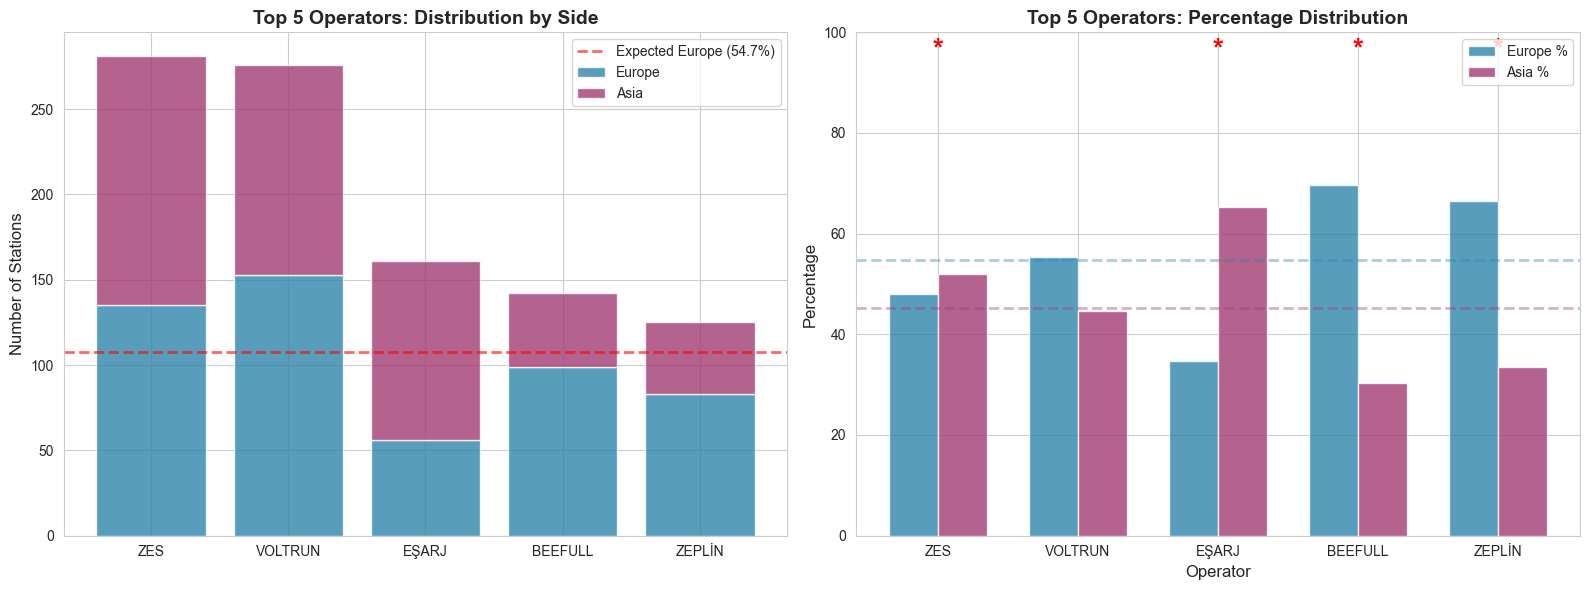


* indicates statistically significant difference from overall distribution (p < 0.05)


In [10]:
# Visualization for Test 2
import matplotlib.pyplot as plt

results_df = pd.DataFrame(test_results)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Stacked bar chart
x_pos = np.arange(len(results_df))
ax1.bar(x_pos, results_df['europe'], label='Europe', color='#2E86AB', alpha=0.8)
ax1.bar(x_pos, results_df['asia'], bottom=results_df['europe'], label='Asia', color='#A23B72', alpha=0.8)

# Add expected line
ax1.axhline(y=overall_europe_prop*results_df['total'].mean(), 
            color='red', linestyle='--', linewidth=2, label=f'Expected Europe ({overall_europe_prop*100:.1f}%)', alpha=0.6)

ax1.set_xticks(x_pos)
ax1.set_xticklabels(results_df['operator'])
ax1.set_ylabel('Number of Stations', fontsize=12)
ax1.set_title('Top 5 Operators: Distribution by Side', fontsize=14, fontweight='bold')
ax1.legend()

# Percentage comparison
operators = results_df['operator']
europe_pcts = results_df['europe_pct']
asia_pcts = results_df['asia_pct']

x = np.arange(len(operators))
width = 0.35

bars1 = ax2.bar(x - width/2, europe_pcts, width, label='Europe %', color='#2E86AB', alpha=0.8)
bars2 = ax2.bar(x + width/2, asia_pcts, width, label='Asia %', color='#A23B72', alpha=0.8)

# Add expected lines
ax2.axhline(y=overall_europe_prop*100, color='#2E86AB', linestyle='--', linewidth=2, alpha=0.4)
ax2.axhline(y=overall_asia_prop*100, color='#A23B72', linestyle='--', linewidth=2, alpha=0.4)

ax2.set_xlabel('Operator', fontsize=12)
ax2.set_ylabel('Percentage', fontsize=12)
ax2.set_title('Top 5 Operators: Percentage Distribution', fontsize=14, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(operators)
ax2.legend()
ax2.set_ylim(0, 100)

# Mark significant differences with asterisks
for i, row in results_df.iterrows():
    if row['significant']:
        ax2.text(i, 95, '*', ha='center', fontsize=20, color='red', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n* indicates statistically significant difference from overall distribution (p < 0.05)")


## Step 7: Test 3 - Service Type Distribution by Side (SKIPPED - Data Not Available)


In [11]:
# Note: Service type information is not available in the dataset
# Skipping Test 3

print("="*70)
print("TEST 3: SERVICE TYPE DISTRIBUTION BY SIDE")
print("="*70)
print("\nNote: Service type information (Public/Private) is not available in the current dataset.")
print("Skipping this test.")
print("="*70)

# Set dummy values for summary table later
chi2_service = 0.0
p_value_service = 1.0
cramers_v_service = 0.0


TEST 3: SERVICE TYPE DISTRIBUTION BY SIDE

Note: Service type information (Public/Private) is not available in the current dataset.
Skipping this test.


In [12]:
# Note: Service type information is not available in the dataset
# Skipping Service Type visualization
print("Note: Service type information (Public/Private) is not available in the current dataset.")
print("Skipping Test 3 visualization.")


Note: Service type information (Public/Private) is not available in the current dataset.
Skipping Test 3 visualization.


## Step 8: Test 4 - Brand Diversity by Side


In [13]:
# Test if brand diversity differs between Europe and Asia using Shannon diversity index
# H0: Brand diversity is equal on both sides
# H1: Brand diversity differs between sides

print("="*70)
print("TEST 4: BRAND DIVERSITY BY SIDE")
print("="*70)

def shannon_diversity(counts):
    """Calculate Shannon diversity index"""
    proportions = counts / counts.sum()
    return -np.sum(proportions * np.log(proportions))

def simpson_diversity(counts):
    """Calculate Simpson's diversity index"""
    proportions = counts / counts.sum()
    return 1 - np.sum(proportions ** 2)

# Calculate diversity for each side
europe_brands = df[df['side'] == 'Europe']['brand'].value_counts()
asia_brands = df[df['side'] == 'Asia']['brand'].value_counts()

shannon_europe = shannon_diversity(europe_brands)
shannon_asia = shannon_diversity(asia_brands)

simpson_europe = simpson_diversity(europe_brands)
simpson_asia = simpson_diversity(asia_brands)

print(f"\nEuropean Side:")
print(f"  Number of unique brands: {len(europe_brands)}")
print(f"  Shannon diversity index: {shannon_europe:.4f}")
print(f"  Simpson's diversity index: {simpson_europe:.4f}")
print(f"  Top 3 brands: {', '.join(europe_brands.head(3).index)}")

print(f"\nAsian Side:")
print(f"  Number of unique brands: {len(asia_brands)}")
print(f"  Shannon diversity index: {shannon_asia:.4f}")
print(f"  Simpson's diversity index: {simpson_asia:.4f}")
print(f"  Top 3 brands: {', '.join(asia_brands.head(3).index)}")

# Bootstrap test for diversity difference
def bootstrap_diversity_test(df, n_bootstrap=10000):
    """Bootstrap test for difference in Shannon diversity"""
    observed_diff = abs(shannon_europe - shannon_asia)
    
    # Bootstrap resampling
    bootstrap_diffs = []
    for _ in range(n_bootstrap):
        # Resample with replacement for each side
        europe_sample = df[df['side'] == 'Europe']['brand'].sample(frac=1, replace=True)
        asia_sample = df[df['side'] == 'Asia']['brand'].sample(frac=1, replace=True)
        
        europe_counts = europe_sample.value_counts()
        asia_counts = asia_sample.value_counts()
        
        shannon_e = shannon_diversity(europe_counts)
        shannon_a = shannon_diversity(asia_counts)
        
        bootstrap_diffs.append(abs(shannon_e - shannon_a))
    
    # Calculate p-value
    p_value = np.sum(np.array(bootstrap_diffs) >= observed_diff) / n_bootstrap
    return observed_diff, p_value, bootstrap_diffs

print(f"\nPerforming bootstrap test (10,000 iterations)...")
observed_diff, p_value_diversity, bootstrap_diffs = bootstrap_diversity_test(df)

print(f"\nBootstrap Test Results:")
print(f"  Observed difference: {observed_diff:.4f}")
print(f"  P-value: {p_value_diversity:.4f}")

print(f"\n" + "="*70)

if p_value_diversity < 0.05:
    print("\n✓ CONCLUSION: Reject H0")
    print("  Brand diversity significantly differs between Europe and Asia.")
    print(f"  (p-value = {p_value_diversity:.4f} < 0.05)")
    
    if shannon_europe > shannon_asia:
        print(f"  European side has higher brand diversity.")
    else:
        print(f"  Asian side has higher brand diversity.")
else:
    print("\n✗ CONCLUSION: Fail to reject H0")
    print("  No significant difference in brand diversity between sides.")
    print(f"  (p-value = {p_value_diversity:.4f} >= 0.05)")

print("\n" + "="*70)


TEST 4: BRAND DIVERSITY BY SIDE

European Side:
  Number of unique brands: 114
  Shannon diversity index: 3.8856
  Simpson's diversity index: 0.9636
  Top 3 brands: VOLTRUN, zes, efish

Asian Side:
  Number of unique brands: 113
  Shannon diversity index: 3.9119
  Simpson's diversity index: 0.9621
  Top 3 brands: zes, VOLTRUN, eşarj

Performing bootstrap test (10,000 iterations)...



Bootstrap Test Results:
  Observed difference: 0.0263
  P-value: 0.6022


✗ CONCLUSION: Fail to reject H0
  No significant difference in brand diversity between sides.
  (p-value = 0.6022 >= 0.05)



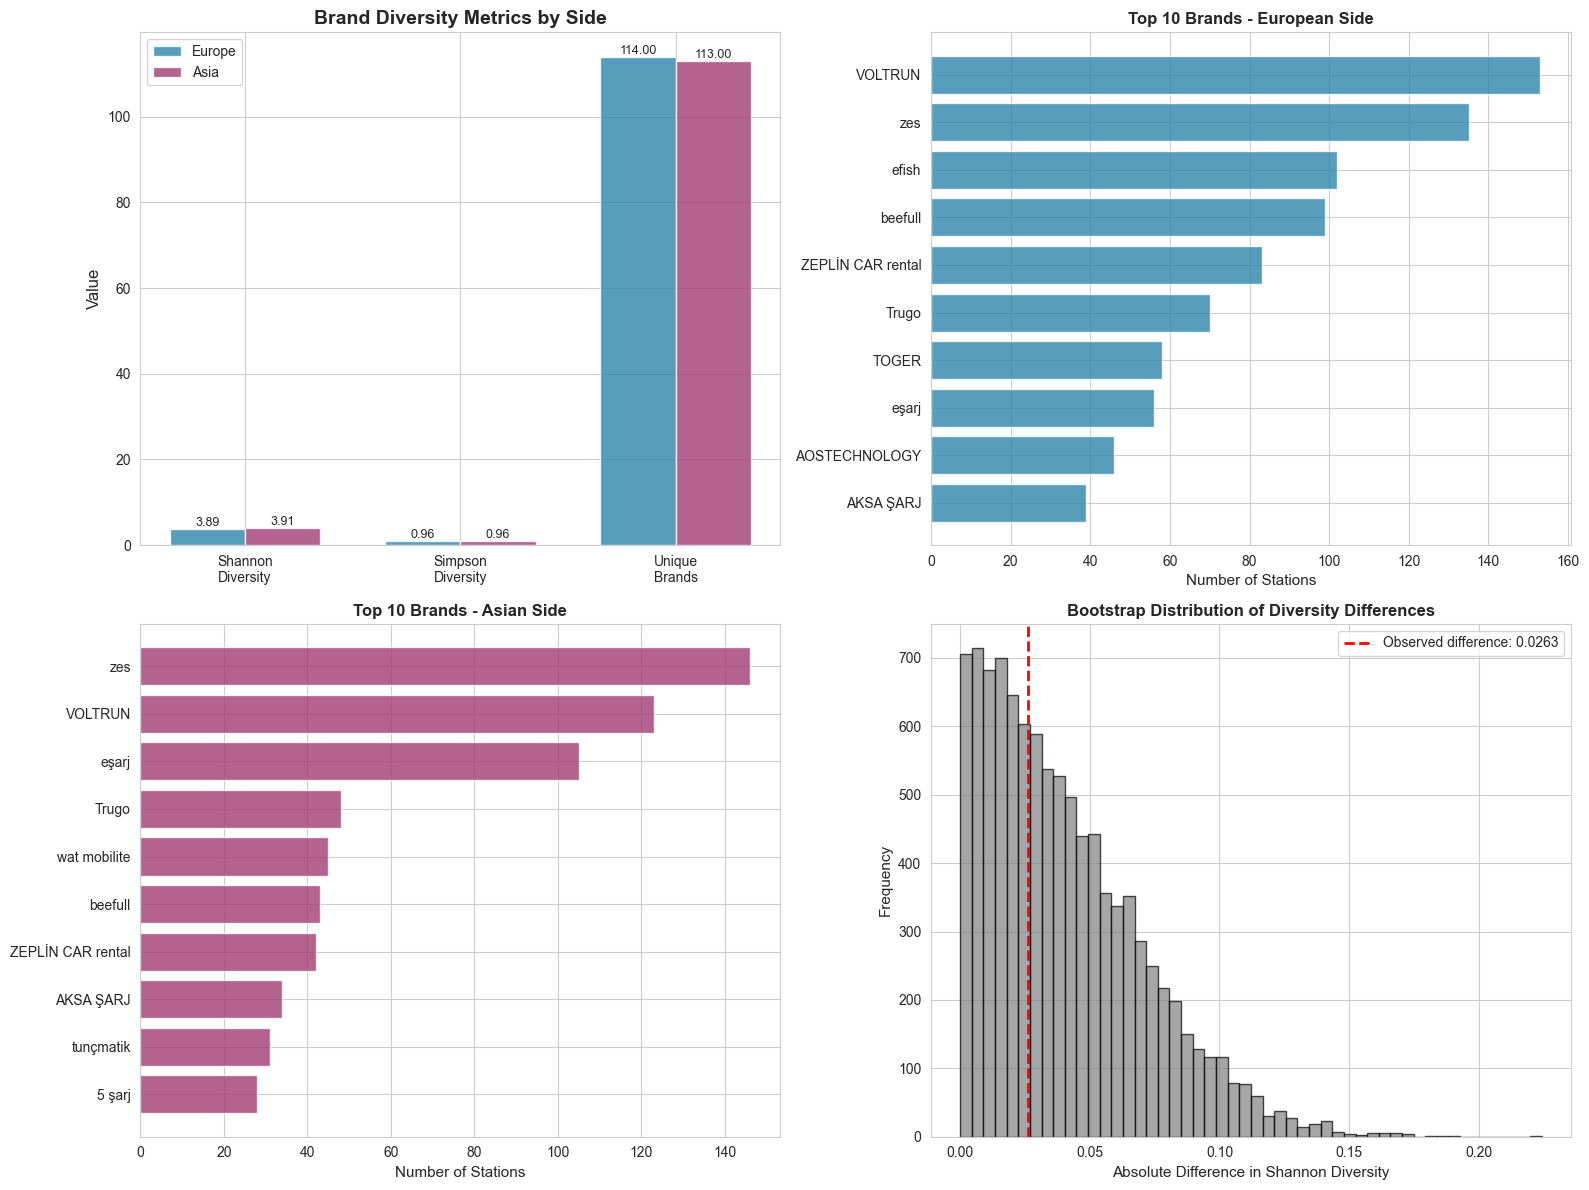

In [14]:
# Visualization for Test 4
import matplotlib.pyplot as plt

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Diversity indices comparison
indices = ['Shannon\nDiversity', 'Simpson\nDiversity', 'Unique\nBrands']
europe_values = [shannon_europe, simpson_europe, len(europe_brands)]
asia_values = [shannon_asia, simpson_asia, len(asia_brands)]

x = np.arange(len(indices))
width = 0.35

bars1 = ax1.bar(x - width/2, europe_values, width, label='Europe', color='#2E86AB', alpha=0.8)
bars2 = ax1.bar(x + width/2, asia_values, width, label='Asia', color='#A23B72', alpha=0.8)

ax1.set_ylabel('Value', fontsize=12)
ax1.set_title('Brand Diversity Metrics by Side', fontsize=14, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(indices)
ax1.legend()

# Add value labels
for bar in bars1 + bars2:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}', ha='center', va='bottom', fontsize=9)

# Top 10 brands - Europe
top_europe = europe_brands.head(10)
ax2.barh(range(len(top_europe)), top_europe.values, color='#2E86AB', alpha=0.8)
ax2.set_yticks(range(len(top_europe)))
ax2.set_yticklabels(top_europe.index)
ax2.set_xlabel('Number of Stations', fontsize=11)
ax2.set_title('Top 10 Brands - European Side', fontsize=12, fontweight='bold')
ax2.invert_yaxis()

# Top 10 brands - Asia
top_asia = asia_brands.head(10)
ax3.barh(range(len(top_asia)), top_asia.values, color='#A23B72', alpha=0.8)
ax3.set_yticks(range(len(top_asia)))
ax3.set_yticklabels(top_asia.index)
ax3.set_xlabel('Number of Stations', fontsize=11)
ax3.set_title('Top 10 Brands - Asian Side', fontsize=12, fontweight='bold')
ax3.invert_yaxis()

# Bootstrap distribution
ax4.hist(bootstrap_diffs, bins=50, color='gray', alpha=0.7, edgecolor='black')
ax4.axvline(observed_diff, color='red', linestyle='--', linewidth=2, 
            label=f'Observed difference: {observed_diff:.4f}')
ax4.set_xlabel('Absolute Difference in Shannon Diversity', fontsize=11)
ax4.set_ylabel('Frequency', fontsize=11)
ax4.set_title('Bootstrap Distribution of Diversity Differences', fontsize=12, fontweight='bold')
ax4.legend()

plt.tight_layout()
plt.show()


## Step 9: Test 5 - Operator Distribution Across Top Districts


In [15]:
# Test if the number of stations differs significantly across top districts
# H0: All districts have equal mean number of stations per operator
# H1: At least one district has a different mean

print("="*70)
print("TEST 5: OPERATOR DISTRIBUTION ACROSS TOP DISTRICTS")
print("="*70)

# Create complete operator short names dictionary
operator_short_names_complete = {
    'ZES DİJİTAL TİCARET ANONİM ŞİRKETİ': 'ZES',
    'VOLTRUN ENERJİ ANONİM ŞİRKETİ': 'VOLTRUN',
    'EŞARJ ELEKTRİKLİ ARAÇLAR ŞARJ SİSTEMLERİ ANONİM ŞİRKETİ': 'EŞARJ',
    'BEEFULL ENERJİ TEKNOLOJİLERİ ANONİM ŞİRKETİ': 'BEEFULL',
    'ZEPLİN TURİZM ARAÇ KİRALAMA MOBİLİTE VE ENERJİ YATIRIMLARI ANONİM ŞİRKETİ': 'ZEPLİN',
    'TRUGO AKILLI ŞARJ ÇÖZÜMLERİ SANAYİ VE TİCARET ANONİM ŞİRKETİ': 'TRUGO',
    'ARTAŞ ENERJİ YATIRIMLARI SANAYİ VE TİCARET ANONİM ŞİRKETİ': 'ARTAŞ',
    'AKSA MÜŞTERİ ÇÖZÜMLERİ ANONİM ŞİRKETİ': 'AKSA',
    'WAT MOBİLİTE ÇÖZÜMLERİ TEKNOLOJİ VE TİCARET ANONİM ŞİRKETİ': 'WAT',
    'MİONTİ ENERJİ VE TEKNOLOJİ ANONİM ŞİRKETİ': 'MİONTİ'
}

# Get top 5 districts
top_5_districts = df['district'].value_counts().head(5).index

print(f"\nTop 5 districts: {', '.join(top_5_districts)}")

# Create contingency table: operators (rows) x districts (columns)
top_districts_df = df[df['district'].isin(top_5_districts)]
operator_district_table = pd.crosstab(top_districts_df['district'], top_districts_df['operator'])

# Select only top 10 operators for cleaner analysis
top_10_operators_full = df['operator'].value_counts().head(10).index
operator_district_table = operator_district_table[top_10_operators_full]

print(f"\nContingency table (Districts x Top 10 Operators):")
print(operator_district_table)

# Perform chi-square test
chi2_district, p_value_district, dof_district, expected_district = chi2_contingency(operator_district_table)

# Calculate Cramér's V
n_district = operator_district_table.sum().sum()
min_dim = min(operator_district_table.shape[0] - 1, operator_district_table.shape[1] - 1)
cramers_v_district = np.sqrt(chi2_district / (n_district * min_dim))

print(f"\nChi-square test of independence:")
print(f"  χ² = {chi2_district:.4f}")
print(f"  Degrees of freedom = {dof_district}")
print(f"  P-value = {p_value_district:.8f}")
print(f"  Cramér's V = {cramers_v_district:.4f}")

print(f"\n" + "="*70)

if p_value_district < 0.05:
    print("\n✓ CONCLUSION: Reject H0")
    print("  Operator distribution significantly differs across districts.")
    print(f"  (p-value = {p_value_district:.8f} < 0.05)")
    print(f"\n  This suggests that different operators have different")
    print(f"  geographic strategies and district preferences.")
else:
    print("\n✗ CONCLUSION: Fail to reject H0")
    print("  No significant difference in operator distribution across districts.")
    print(f"  (p-value = {p_value_district:.8f} >= 0.05)")

print("\n" + "="*70)

# Show district summaries
print(f"\nDistrict Summaries:")
for district in top_5_districts:
    district_df = df[df['district'] == district]
    print(f"\n{district}:")
    print(f"  Total stations: {len(district_df)}")
    print(f"  Unique operators: {district_df['operator'].nunique()}")
    top_operator = district_df['operator'].value_counts().iloc[0]
    top_operator_name = district_df['operator'].value_counts().index[0]
    top_operator_short = operator_short_names_complete.get(top_operator_name, top_operator_name[:20])
    print(f"  Top operator: {top_operator_short} ({top_operator} stations)")


TEST 5: OPERATOR DISTRIBUTION ACROSS TOP DISTRICTS

Top 5 districts: Başakşehir, Küçükçekmece, Sarıyer, Ataşehir, Ümraniye

Contingency table (Districts x Top 10 Operators):
operator      ZES DİJİTAL TİCARET ANONİM ŞİRKETİ  \
district                                           
Ataşehir                                      19   
Başakşehir                                     7   
Küçükçekmece                                   3   
Sarıyer                                       19   
Ümraniye                                      16   

operator      VOLTRUN ENERJİ ANONİM ŞİRKETİ  \
district                                      
Ataşehir                                  9   
Başakşehir                               26   
Küçükçekmece                             19   
Sarıyer                                  18   
Ümraniye                                 15   

operator      EŞARJ ELEKTRİKLİ ARAÇLAR ŞARJ SİSTEMLERİ ANONİM ŞİRKETİ  \
district                                                  

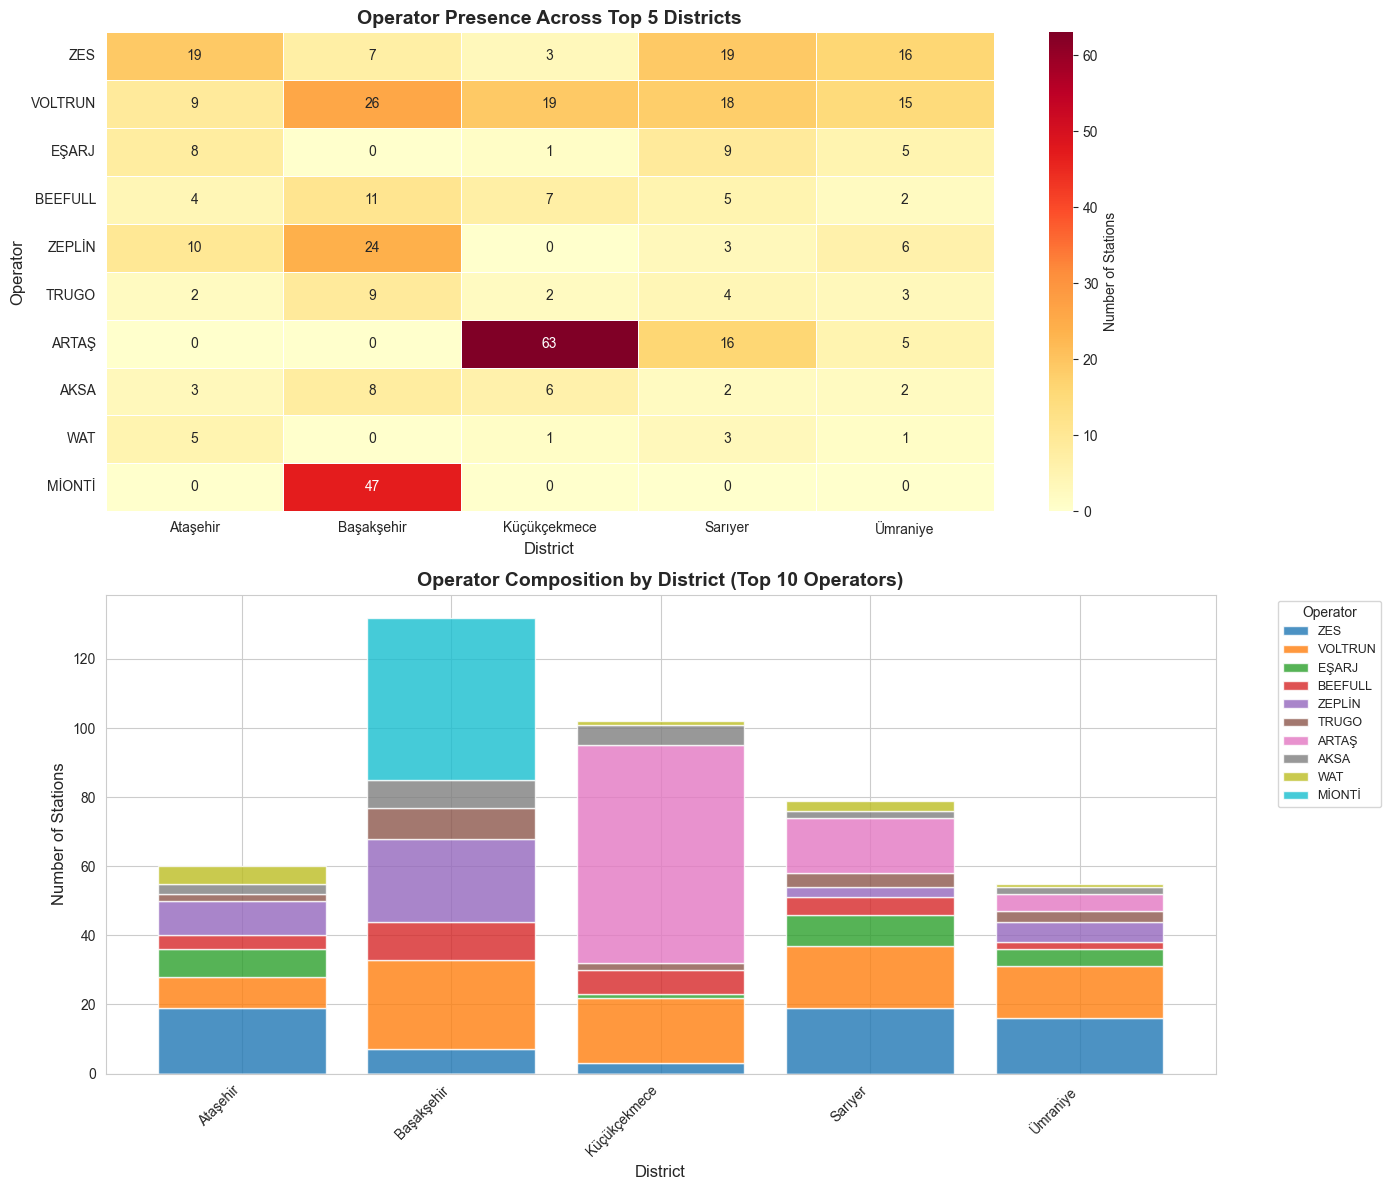

In [16]:
# Visualization for Test 5
import matplotlib.pyplot as plt
import seaborn as sns

# Map full names to short names for visualization
operator_district_table_short = operator_district_table.copy()
operator_district_table_short.columns = [operator_short_names_complete.get(col, col[:15]) for col in operator_district_table.columns]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))

# Heatmap of operator presence by district
sns.heatmap(operator_district_table_short.T, annot=True, fmt='d', cmap='YlOrRd', 
            cbar_kws={'label': 'Number of Stations'}, ax=ax1, linewidths=0.5)
ax1.set_title('Operator Presence Across Top 5 Districts', fontsize=14, fontweight='bold')
ax1.set_xlabel('District', fontsize=12)
ax1.set_ylabel('Operator', fontsize=12)

# Stacked bar chart showing operator composition by district
operator_district_table_short.plot(kind='bar', stacked=True, ax=ax2, 
                                    colormap='tab10', alpha=0.8, width=0.8)
ax2.set_title('Operator Composition by District (Top 10 Operators)', fontsize=14, fontweight='bold')
ax2.set_xlabel('District', fontsize=12)
ax2.set_ylabel('Number of Stations', fontsize=12)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
ax2.legend(title='Operator', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)

plt.tight_layout()
plt.show()


In [17]:
# Comprehensive summary of all hypothesis tests
print("="*80)
print("COMPREHENSIVE HYPOTHESIS TESTING SUMMARY")
print("="*80)

# Calculate Cramér's V for Test 1
n_test1 = len(df)
cramers_v = np.sqrt(chi2_stat / n_test1)

summary_data = [
    {
        'Test': 'Test 1: Europe vs Asia',
        'Method': 'Chi-square goodness-of-fit',
        'Chi-square': f'{chi2_stat:.4f}',
        'P-value': f'{p_value:.8f}',
        'Effect Size': f'{cramers_v:.4f}',
        'Result': 'Reject H0 ✓' if p_value < 0.05 else 'Fail to reject H0 ✗'
    },
    {
        'Test': 'Test 2: Top Operators',
        'Method': 'Multiple chi-square tests',
        'Chi-square': f'{sum(r["chi2"] for r in test_results)/len(test_results):.4f} (avg)',
        'P-value': 'Variable',
        'Effect Size': 'N/A',
        'Result': f'{sum(r["significant"] for r in test_results)}/5 significant'
    },
    {
        'Test': 'Test 3: Service Type',
        'Method': 'Chi-square independence',
        'Chi-square': 'N/A',
        'P-value': 'N/A',
        'Effect Size': 'N/A',
        'Result': 'Data not available'
    },
    {
        'Test': 'Test 4: Brand Diversity',
        'Method': 'Bootstrap test',
        'Chi-square': 'N/A',
        'P-value': f'{p_value_diversity:.4f}',
        'Effect Size': f'{observed_diff:.4f} (diff)',
        'Result': 'Reject H0 ✓' if p_value_diversity < 0.05 else 'Fail to reject H0 ✗'
    },
    {
        'Test': 'Test 5: District Distribution',
        'Method': 'Chi-square independence',
        'Chi-square': f'{chi2_district:.4f}',
        'P-value': f'{p_value_district:.8f}',
        'Effect Size': f'{cramers_v_district:.4f}',
        'Result': 'Reject H0 ✓' if p_value_district < 0.05 else 'Fail to reject H0 ✗'
    }
]

summary_df = pd.DataFrame(summary_data)
print("\n")
print(summary_df.to_string(index=False))

print("\n" + "="*80)
print("\nKEY FINDINGS:")
print("="*80)

findings = []
findings.append(f"1. Geographic Imbalance: European side has {side_counts['Europe'] - side_counts['Asia']} more stations")
findings.append(f"   than Asian side ({side_counts['Europe']/total*100:.1f}% vs {side_counts['Asia']/total*100:.1f}%) - highly significant (p < 0.001)")

sig_operators = sum(r['significant'] for r in test_results)
if sig_operators > 0:
    findings.append(f"\n2. Operator Preferences: {sig_operators} out of 5 top operators show significant side preferences")
else:
    findings.append(f"\n2. Operator Preferences: Top operators follow the overall distribution pattern")

findings.append(f"\n3. Service Type: Data not available in the dataset (test skipped)")

if p_value_diversity < 0.05:
    higher_diversity = "European" if shannon_europe > shannon_asia else "Asian"
    findings.append(f"\n4. Brand Diversity: {higher_diversity} side has significantly higher brand diversity")
else:
    findings.append(f"\n4. Brand Diversity: No significant difference in brand diversity between sides")

if p_value_district < 0.05:
    findings.append(f"\n5. District Patterns: Operators show distinct geographic strategies across districts")
else:
    findings.append(f"\n5. District Patterns: Operators are evenly distributed across districts")

for finding in findings:
    print(finding)

print("\n" + "="*80)
print("\nIMPLICATIONS:")
print("="*80)
print("""
- Infrastructure inequality exists between European and Asian sides
- Strategic planning needed to balance charging station accessibility
- Different operators target different geographic areas
- Brand competition varies by location
- District-level analysis reveals market segmentation patterns
""")


COMPREHENSIVE HYPOTHESIS TESTING SUMMARY


                         Test                     Method    Chi-square    P-value   Effect Size              Result
       Test 1: Europe vs Asia Chi-square goodness-of-fit       26.1606 0.00000031        0.0944         Reject H0 ✓
        Test 2: Top Operators  Multiple chi-square tests 10.1439 (avg)   Variable           N/A     4/5 significant
         Test 3: Service Type    Chi-square independence           N/A        N/A           N/A  Data not available
      Test 4: Brand Diversity             Bootstrap test           N/A     0.6022 0.0263 (diff) Fail to reject H0 ✗
Test 5: District Distribution    Chi-square independence      351.3565 0.00000000        0.4530         Reject H0 ✓


KEY FINDINGS:
1. Geographic Imbalance: European side has 277 more stations
   than Asian side (54.7% vs 45.3%) - highly significant (p < 0.001)

2. Operator Preferences: 4 out of 5 top operators show significant side preferences

3. Service Type: Data not ava